# **Exploración de la información**


Importamos las bibliotecas generales

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos los datos del dataframe de pandas e imprimimos un encabezado con los primeros 5 registros

In [16]:
df = pd.read_csv('../data/processed/TasasCreditoViviendaClean.csv')

print(df.head(5))

            Nombre_Tipo_Entidad             Nombre_Entidad Fecha_Corte  \
0  INSTITUCIÓN OFICIAL ESPECIAL  Fondo Nacional del Ahorro  2023-10-27   
1   BC-ESTABLECIMIENTO BANCARIO            Banco de Bogotá  2023-11-17   
2   BC-ESTABLECIMIENTO BANCARIO                Bancolombia  2023-10-13   
3   BC-ESTABLECIMIENTO BANCARIO            Banco de Bogotá  2023-09-08   
4   BC-ESTABLECIMIENTO BANCARIO              BBVA Colombia  2023-07-21   

        Sexo                                Producto de crédito  \
0  Masculino  Adquisición de vivienda vis (colocación en pesos)   
1  Masculino  Adquisición de vivienda vis (colocación en pesos)   
2   Femenino    Adquisición de vivienda vis (colocación en uvr)   
3   Femenino  Adquisición de vivienda vis (colocación en pesos)   
4   Femenino  Adquisición de vivienda vis (colocación en pesos)   

                 Plazo de crédito  Tasa_efectiva_promedio_ponderada  \
0  Más de 15 años y hasta 20 años                              8.30   
1  Más de 

### **Visión general del Dataset**

Para darnos una vision general de la informacion que estamos manejando utilizaremos las funciones que describan de manera general el dataset y asi poder obtener mayor informacion de los datos que tenemos

In [17]:
df.columns

Index(['Nombre_Tipo_Entidad', 'Nombre_Entidad', 'Fecha_Corte', 'Sexo',
       'Producto de crédito', 'Plazo de crédito',
       'Tasa_efectiva_promedio_ponderada', 'Montos_desembolsados',
       'Numero_de_creditos_desembolsados', 'Tipo_de_Tasa',
       'Rango_monto_desembolsado', 'Clase_deudor'],
      dtype='object')

In [18]:
df.describe()

,Tasa_efectiva_promedio_ponderada,Montos_desembolsados,Numero_de_creditos_desembolsados
count,54242.000000,5.424200e+04,54242.000000
mean,14.719350,3.884510e+08,3.500147
std,4.540355,1.288275e+09,14.472983
min,0.000000,1.000000e+05,1.000000
25%,13.250000,7.000000e+07,1.000000
50%,16.000000,1.200000e+08,1.000000
75%,17.910000,2.500000e+08,2.000000
max,25.720000,6.383443e+10,1022.000000


#### Análisis unidimensional de las variables

En primer lugar, trazaremos una grafica que nos permita tener un overview inicial de los datos, es por eso que haremos uso de la funcion pairplot de la libreria de seaborn, que nos permite relacinar todas las variables numericas, para asi tener una mejor descripcion del dataset

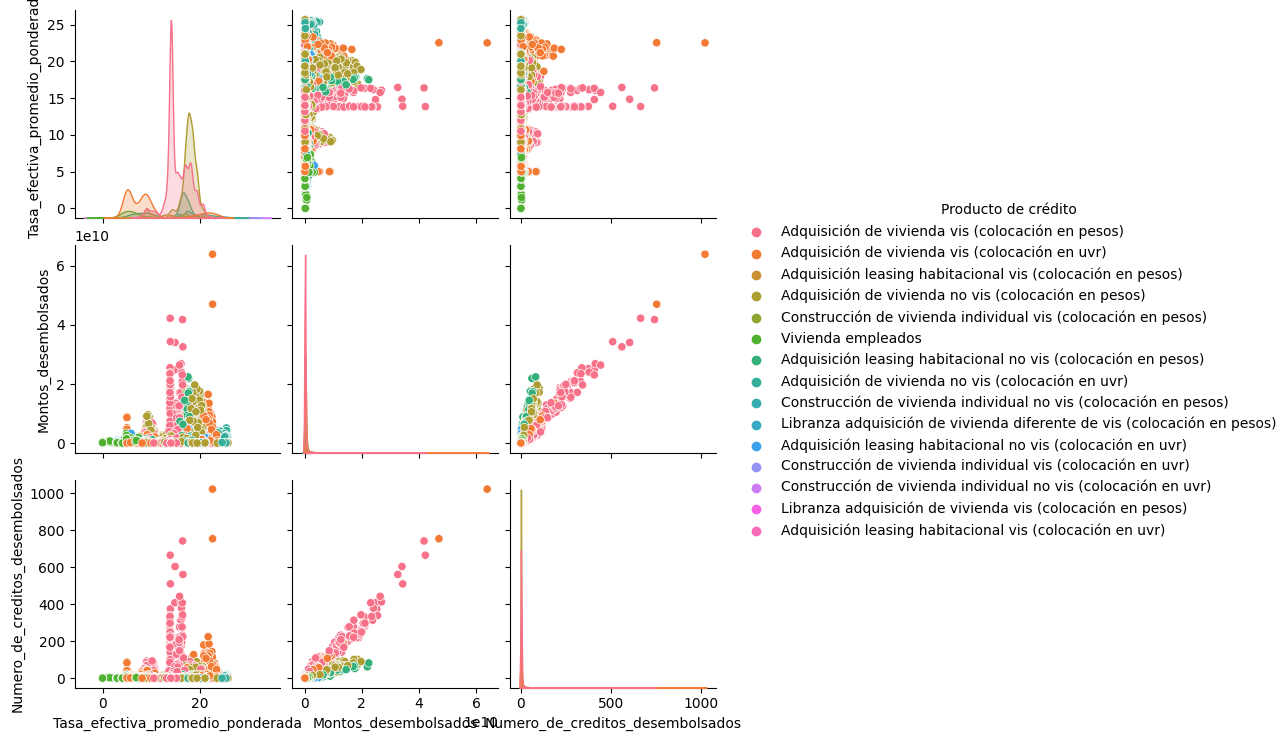

In [19]:
sns.pairplot(data=df,hue='Producto de crédito')
plt.show()

Tambien, es importante conocer que entidad financiera fue la que mayor cantidad de creditos desembolso, ya que con esta informacion podremos analisar con mayor detenimiento el porque de estos resultados, datos otros factores que analizaremos más adelante

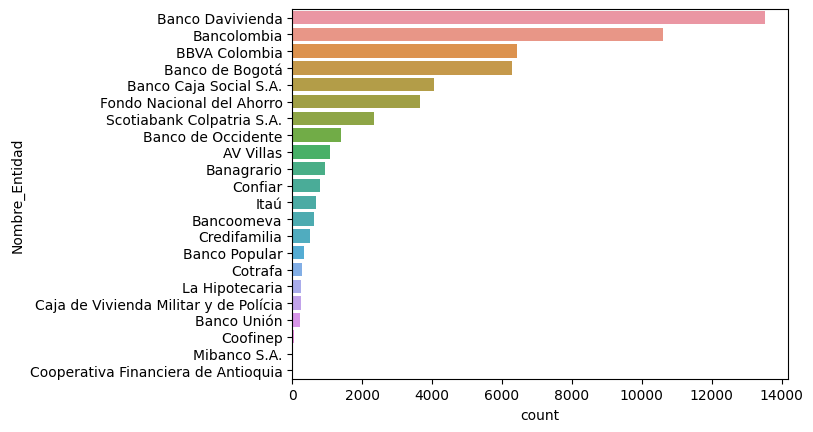

In [20]:
sns.countplot(data=df,y='Nombre_Entidad', order=df['Nombre_Entidad'].value_counts().index)
plt.show()

A su vez, obtendremos el percentil del rango de montos que más fueron desembolsados, ya que esta informacion podremos encontrar la tendencia por la cual las personas pretenden obtener un crédito hipotecario

In [21]:
df['Rango_monto_desembolsado'].value_counts(normalize=True)


Rango_monto_desembolsado
Hasta 135 SMLMV                                  0.791170
Mayor a 135 SMLMV y menor o igual a 235 SMLMV    0.129958
Mayor a 235 SMLMV y menor o igual a 335 SMLMV    0.045585
Mayor a 335 SMLMV y menor o igual a 500 SMLMV    0.022862
Mayor a 500 SMLMV                                0.010425
Name: proportion, dtype: float64

In [22]:
total_montos_entidad = df.groupby('Nombre_Entidad')['Montos_desembolsados'].sum()

In [23]:
total_montos_entidad.sort_values(ascending=False)

Nombre_Entidad
Banco Davivienda                         5.994494e+12
Bancolombia                              4.322813e+12
BBVA Colombia                            2.440813e+12
Banco de Bogotá                          2.295319e+12
Fondo Nacional del Ahorro                1.461660e+12
Banco Caja Social S.A.                   1.304874e+12
Scotiabank Colpatria S.A.                1.050870e+12
Banco de Occidente                       7.918934e+11
Itaú                                     3.386318e+11
AV Villas                                2.798657e+11
Banagrario                               2.158541e+11
Bancoomeva                               1.477613e+11
Credifamilia                             1.139156e+11
Banco Popular                            8.705696e+10
Confiar                                  7.491282e+10
Banco Unión                              4.743324e+10
Caja de Vivienda Militar y de Polícia    3.370277e+10
La Hipotecaria                           3.199402e+10
Cotrafa      

#### Análisis multidimensional de las variables

En esta seccion podemos hacer un analisis correlacionado de diferentes variables que se relacionen entre si

In [24]:
top_desembolsos = df.groupby(['Nombre_Entidad','Producto de crédito']).sum()['Montos_desembolsados'].sort_values().unstack('Producto de crédito')
top_desembolsos

Producto de crédito,Adquisición de vivienda no vis (colocación en pesos),Adquisición de vivienda no vis (colocación en uvr),Adquisición de vivienda vis (colocación en pesos),Adquisición de vivienda vis (colocación en uvr),Adquisición leasing habitacional no vis (colocación en pesos),Adquisición leasing habitacional no vis (colocación en uvr),Adquisición leasing habitacional vis (colocación en pesos),Adquisición leasing habitacional vis (colocación en uvr),Construcción de vivienda individual no vis (colocación en pesos),Construcción de vivienda individual no vis (colocación en uvr),Construcción de vivienda individual vis (colocación en pesos),Construcción de vivienda individual vis (colocación en uvr),Libranza adquisición de vivienda diferente de vis (colocación en pesos),Libranza adquisición de vivienda vis (colocación en pesos),Vivienda empleados
Nombre_Entidad,,,,,,,,,,,,,,,
AV Villas,1.740723e+11,2.558652e+10,4.239278e+10,1.366624e+10,1.157821e+10,NaN,5.296000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.204004e+10
BBVA Colombia,1.196723e+12,1.926713e+11,3.390370e+11,1.472747e+11,4.662808e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.882658e+10
Banagrario,1.450699e+11,1.847685e+09,5.850267e+10,1.243805e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.190064e+09
Banco Caja Social S.A.,4.116299e+11,3.597085e+10,8.088842e+11,4.809119e+10,2.980000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Banco Davivienda,1.660373e+12,9.026945e+10,1.979057e+12,7.444095e+11,1.242946e+12,1.233603e+11,5.882943e+10,5.336231e+09,NaN,NaN,NaN,NaN,1.880083e+10,4.008449e+09,6.710372e+10
Banco Popular,3.099809e+10,NaN,9.136078e+09,NaN,4.696169e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.222662e+10
Banco Unión,3.203035e+10,NaN,1.540289e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Banco de Bogotá,7.641229e+11,NaN,1.216677e+12,NaN,1.561199e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.583988e+11
Banco de Occidente,3.979586e+11,7.493113e+10,3.482724e+10,7.505188e+09,2.019836e+11,6.927024e+10,3.261639e+09,1.602476e+09,5.532332e+08,NaN,NaN,NaN,NaN,NaN,NaN


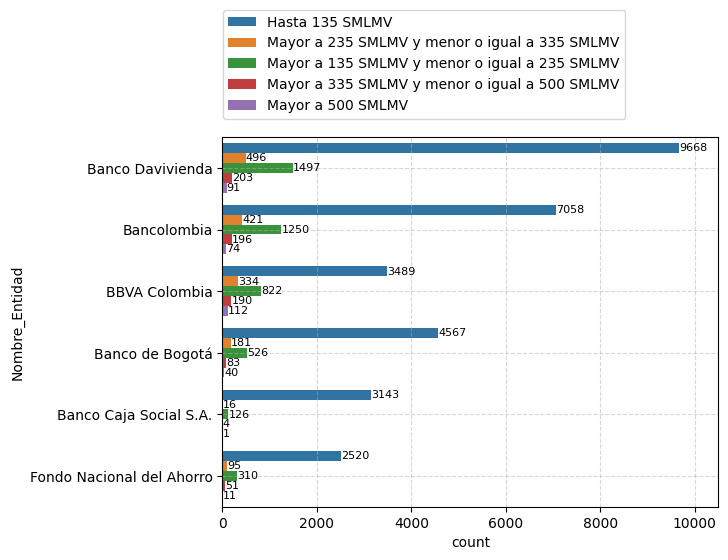

In [25]:
ax = sns.countplot(data=df,y='Nombre_Entidad', order=df['Nombre_Entidad'].value_counts().index[0:6], hue='Rango_monto_desembolsado',dodge=True)
plt.legend(bbox_to_anchor=(0.001, 1.05), borderaxespad=0)
plt.grid(linestyle='--', alpha=0.5)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)
ax.set_xlim(right=10500)
plt.show()